# Which neighborhoods are more crowded and expensive?

# 1. Gather

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
# Load in listings data.
listings_df = pd.read_csv('listings.csv',sep=',')

# 2. Assess

In [3]:
# Create a new dataframe with only needed columns
needed_columns=['id','neighbourhood_group_cleansed','price']
listings_df_clean= pd.DataFrame(data=listings_df, index=listings_df.index, columns=needed_columns) 
listings_df_clean.head()

,id,neighbourhood_group_cleansed,price
0,241032,Queen Anne,$85.00
1,953595,Queen Anne,$150.00
2,3308979,Queen Anne,$975.00
3,7421966,Queen Anne,$100.00
4,278830,Queen Anne,$450.00


In [4]:
# The number of rows and columns of listings data
listings_df_clean.shape

(3818, 3)

In [5]:
# The columns information of listings data
listings_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 3 columns):
id                              3818 non-null int64
neighbourhood_group_cleansed    3818 non-null object
price                           3818 non-null object
dtypes: int64(1), object(2)
memory usage: 89.6+ KB


# 3. Clean and Analyze

## 3.1. Handle Inconsistent Data

In [6]:
# Change the type of price feature to float
listings_df_clean['price']= pd.to_numeric(listings_df_clean['price'].str.translate({ord(i): None for i in '$,'}))
listings_df_clean['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

## 3.2. Handle Missing Data

In [7]:
# Missing data in each column
listings_df_clean.isnull().mean().sort_values(ascending=False)

price                           0.0
neighbourhood_group_cleansed    0.0
id                              0.0
dtype: float64

**No Missing Data is found**

# 4. Model and Visualize

## 4.1. Price Variance

In [8]:
# Average price for each neighbourhood group
neighbourhood_groups_price=listings_df_clean.groupby(['neighbourhood_group_cleansed'])['price'].mean()

# Sort values in descending order
neighbourhood_groups_price=neighbourhood_groups_price.sort_values(ascending=False)
neighbourhood_groups_price

neighbourhood_group_cleansed
Magnolia               177.672131
Queen Anne             157.223729
Downtown               154.405660
West Seattle           141.359606
Cascade                140.101124
Capitol Hill           130.592593
Central Area           128.338753
Ballard                124.682609
Other neighborhoods    119.968514
Interbay               109.727273
Seward Park            108.477273
Beacon Hill             94.669492
University District     93.639344
Lake City               92.671642
Rainier Valley          91.899371
Northgate               88.550000
Delridge                83.278481
Name: price, dtype: float64

In [9]:
# Get statistical information
neighbourhood_groups_price.describe()

count     17.000000
mean     119.838682
std       27.847598
min       83.278481
25%       93.639344
50%      119.968514
75%      140.101124
max      177.672131
Name: price, dtype: float64

In [10]:
# Consider neighbourhood with avergae price over 140 to be expensive (above 75% of data)
high_price_neighbourhood_val=neighbourhood_groups_price[neighbourhood_groups_price>140]

# Get names of high price months
high_price_neighbourhood=high_price_neighbourhood_val.index.tolist()
high_price_neighbourhood

['Magnolia', 'Queen Anne', 'Downtown', 'West Seattle', 'Cascade']

In [11]:
# Consider neighbourhood with avergae price under 93 to be cheap (under 25% of data)
low_price_neighbourhood_val=neighbourhood_groups_price[neighbourhood_groups_price<93]

# Get names of high price months
low_price_neighbourhood=low_price_neighbourhood_val.index.tolist()
low_price_neighbourhood

['Lake City', 'Rainier Valley', 'Northgate', 'Delridge']

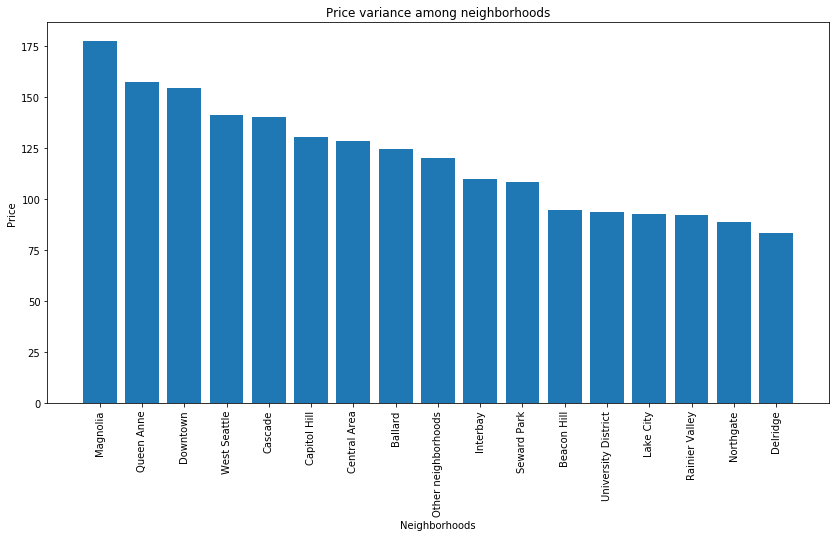

In [12]:
# Plot the average price per neighbourhoods
plt.figure(figsize=(14,7))
plt.bar(neighbourhood_groups_price.index,neighbourhood_groups_price)
plt.xticks(rotation=90)
plt.xlabel('Neighborhoods')
plt.ylabel('Price')
plt.title('Price variance among neighborhoods')
plt.show()

**Based on the above graph,**
- Magnolia, Queen Anne, Downtown, and Cascade are the most expensive.
- Delridge, Northgate, Rainier Valley, and Lake City are the cheapest.

## 4.2. Listings Distribution

In [13]:
# The average number of listings for each neighbourhood group
neighbourhood_group_popular=listings_df_clean.groupby(['neighbourhood_group_cleansed'])['id'].count()/listings_df_clean.shape[0]

# Sort values in descending order
neighbourhood_group_popular=neighbourhood_group_popular.sort_values(ascending=False)
neighbourhood_group_popular

neighbourhood_group_cleansed
Other neighborhoods    0.207962
Capitol Hill           0.148507
Downtown               0.138816
Central Area           0.096647
Queen Anne             0.077266
Ballard                0.060241
West Seattle           0.053169
Rainier Valley         0.041645
University District    0.031954
Beacon Hill            0.030906
Cascade                0.023311
Northgate              0.020953
Delridge               0.020691
Lake City              0.017548
Magnolia               0.015977
Seward Park            0.011524
Interbay               0.002881
Name: id, dtype: float64

In [14]:
# Get statistical information
neighbourhood_group_popular.describe()

count    17.000000
mean      0.058824
std       0.057739
min       0.002881
25%       0.020691
50%       0.031954
75%       0.077266
max       0.207962
Name: id, dtype: float64

In [15]:
# Consider neighbourhood with The average number of listings over 0.08 to be popular (above 75% of data)
pop_neighbourhood_val=neighbourhood_group_popular[neighbourhood_group_popular>0.08]

# Get names of high price months
pop_neighbourhood=pop_neighbourhood_val.index.tolist()
pop_neighbourhood

['Other neighborhoods', 'Capitol Hill', 'Downtown', 'Central Area']

In [16]:
# Consider neighbourhood with The average number of listings under 0.02 to be unpopular (under 25% of data)
unpop_neighbourhood_val=neighbourhood_group_popular[neighbourhood_group_popular<0.02]

# Get names of high price months
unpop_neighbourhood=unpop_neighbourhood_val.index.tolist()
unpop_neighbourhood

['Lake City', 'Magnolia', 'Seward Park', 'Interbay']

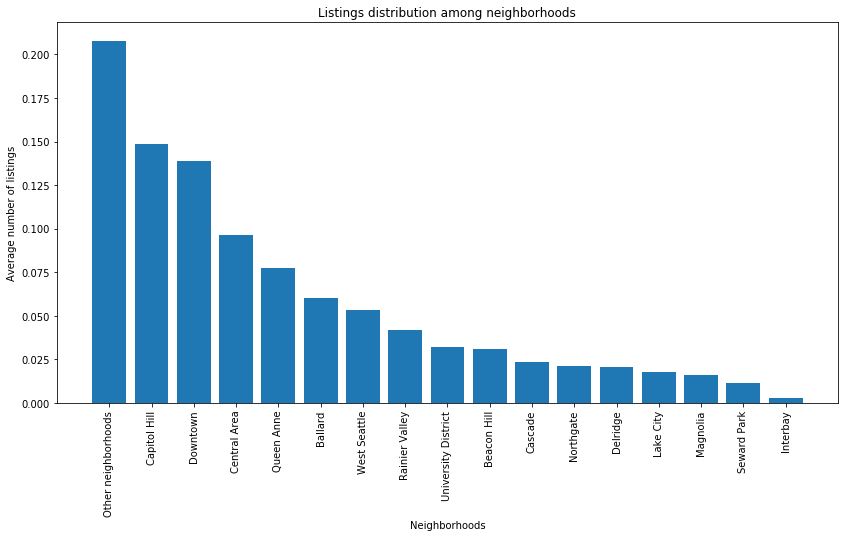

In [17]:
# Plot Average number of listings per neighbourhoods
plt.figure(figsize=(14,7))
plt.bar(neighbourhood_group_popular.index,neighbourhood_group_popular)
plt.xticks(rotation=90)
plt.xlabel('Neighborhoods')
plt.ylabel('Average number of listings')
plt.title('Listings distribution among neighborhoods')
plt.show()

**Based on the above graph,**
- Capitol Hill, Downtown, and Central Area are the most crowded.
- Interbay, Seward Park, Magnolia, and Lake City are the least crowded.

In [18]:
# Get monhts that are expensive and crowded
list(set(high_price_neighbourhood) & set(pop_neighbourhood) )

['Downtown']

In [19]:
# Get monhts that are expensive and less crowded
list(set(high_price_neighbourhood) & set(unpop_neighbourhood) )

['Magnolia']

In [20]:
# Get monhts that are cheap and crowded
list(set(low_price_neighbourhood) & set(pop_neighbourhood) )

[]

In [21]:
# Get monhts that are cheap and less crowded
list(set(low_price_neighbourhood) & set(unpop_neighbourhood) )

['Lake City']

**In Conclusion,** 
- Downtown is expensive and more crowded
- Magnolia is expensive and less crowded 
- Lake City is cheap and less crowded